In [242]:
import pandas as pd
from sklearn import tree 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
%matplotlib inline

In [243]:
train = pd.read_csv('/home/pv/Downloads/train.csv')
test = pd.read_csv('/home/pv/Downloads/test.csv')

In [244]:
y = train.pop('Survived')

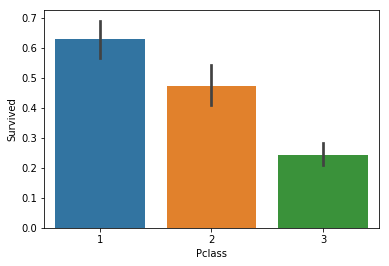

In [245]:
eixo_x = train.Pclass
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

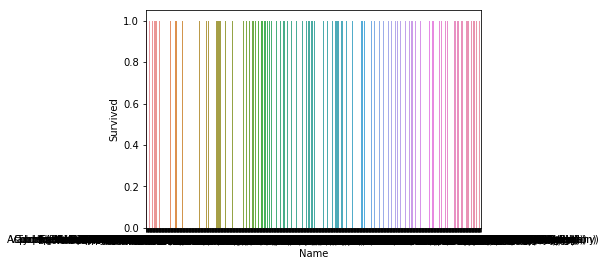

In [246]:
eixo_x = train.Name
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

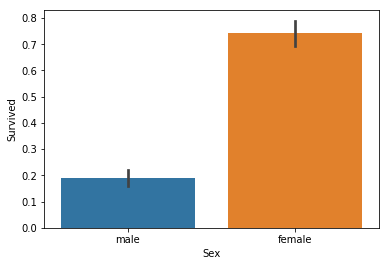

In [247]:
eixo_x = train.Sex
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

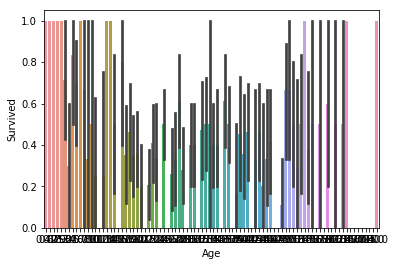

In [248]:
eixo_x = train.Age
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

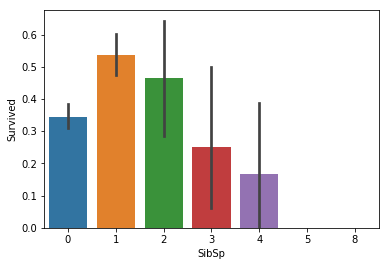

In [249]:
eixo_x = train.SibSp
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

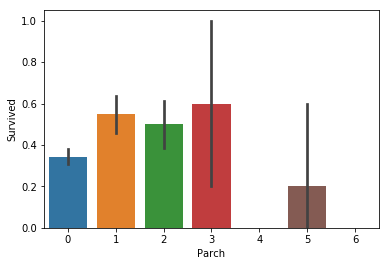

In [250]:
eixo_x = train.Parch
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

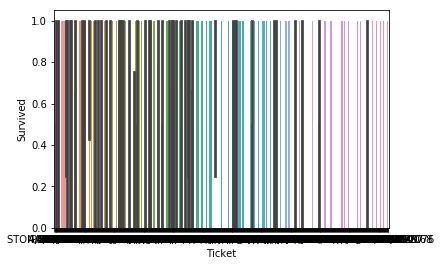

In [251]:
eixo_x = train.Ticket
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

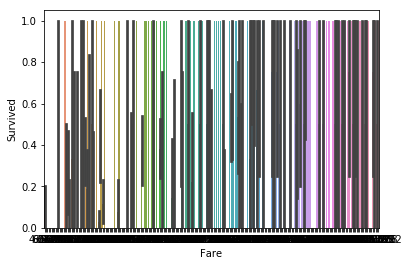

In [252]:
eixo_x = train.Fare
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

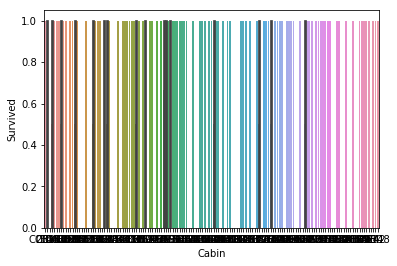

In [253]:
eixo_x = train.Cabin
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

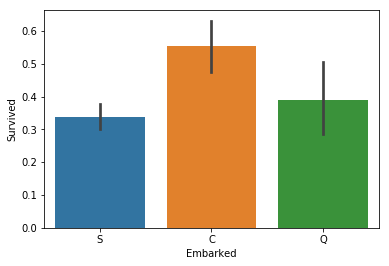

In [254]:
eixo_x = train.Embarked
eixo_y = y
sns.barplot(x = eixo_x, y = eixo_y)

In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [256]:
train.drop(['Age','Name','Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [257]:
train.head()

,PassengerId,Pclass,SibSp,Parch,Fare
0,1,3,1,0,7.2500
1,2,1,1,0,71.2833
2,3,3,0,0,7.9250
3,4,1,1,0,53.1000
4,5,3,0,0,8.0500


In [258]:
Modelo1 = tree.DecisionTreeClassifier()
Modelo1.fit(train, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [259]:
Modelo2 = RandomForestRegressor(n_estimators = 20, random_state = 0)
Modelo2.fit(train, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [260]:
accuracy_score(y, Modelo1.predict(train))

1.0

In [261]:
accuracy_score(y, Modelo2.predict(train).round())

0.9887766554433222

In [262]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [263]:
test.drop(['Age','Name','Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [264]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
dtypes: float64(1), int64(4)
memory usage: 16.4 KB


In [265]:
test['Fare'].fillna(test.Fare.mean(), inplace = True)

In [266]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(1), int64(4)
memory usage: 16.4 KB


In [274]:
Previsao = Modelo1.predict(test)

In [275]:
Previsao

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [276]:
submission = pd.DataFrame({"PassengerId" : test["PassengerId"], "Survived" : Previsao})
submission.to_csv("Resultado_PV.csv", index = False)